#Regresión Lineal

Universidad Nacional Autónoma de México

Facultad de Estudios Superiores Acatlán

Licenciatura en Ciencia de Datos

Rosales Herrera Jonathan Adrian

3-1724328-6

23/08/2023

---

##Objetivo

El objetivo principal de este proyecto es evaluar a través de diferentes técnicas de preprocesamiento, Label Encoder, One Hot Encoder y Standard Scaler, afectan el rendimiento y la estabilidad de un modelo de regresión lineal. Se busca proporcionar una comprensión más profunda de cómo estas transformaciones de datos influyen en la capacidad del modelo para realizar predicciones precisas y cómo pueden contribuir a la convergencia y la robustez del proceso de entrenamiento.

##Materiales y Métodos


*   Conjunto de datos *datos.csv*
*   Conjunto de datos *Salario.csv*
*   Herramientas de Programación (Google Colaboratory)

##Resumen

Se implementaron diversas técnicas de preprocesamiento de datos para observar su influencia en el rendimiento de un modelo de regresión lineal. Particularmente, se examinaron los efectos de la codificación de etiquetas, la codificación one-hot y el escalamiento estándar en la calidad predictiva y la estabilidad del modelo. El estudio se llevó a cabo utilizando diferentes conjuntos de datos representativos y se compararon diferentes enfoques para evaluar sus resultados.

##Antecedentes Teóricos

La regresión Lineal es un método de aprendizaje supervisado que establece una relación lineal entre una o más variables predictoras y una variable objetivo. Esta ecuación se observa como una recta que se ajusta a la dispersión de los datos minimizando la suma de los cuadrados de las diferencias entre las observaciones reales y las predicciones generadas por el modelo

##Desarrollo

Importamos las librerías necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

Cargamos el conjunto de datos *datos.csv*

In [ ]:
df = pd.read_csv('/content/datos.csv')
df

Seleccionamos el conjunto de variables X, excluyendo la variable objetivo

In [ ]:
X = df.iloc[:,:-1].values
X

array([['Francia', 44.0, 72000.0],
       ['Mexico', 27.0, 48000.0],
       ['Alemania', 30.0, 54000.0],
       ['Mexico', 38.0, 61000.0],
       ['Alemania', 40.0, nan],
       ['Francia', 35.0, 58000.0],
       ['Mexico', nan, 52000.0],
       ['Francia', 48.0, 79000.0],
       ['Alemania', 50.0, 83000.0],
       ['Francia', 37.0, 67000.0]], dtype=object)

Seleccionamos la variable objetivo

In [ ]:
y = df.iloc[:,3].values
y

array(['No', 'Si', 'No', 'No', 'Si', 'Si', 'No', 'Si', 'No', 'Si'],
      dtype=object)

Imputamos las observaciones nulas con la media del campo

In [ ]:
varImp = SimpleImputer(missing_values= np.NaN, strategy='mean')

In [ ]:
varImp.fit(X[:,1:3])
X[ : , 1:3] = varImp.transform(X[:, 1:3])
X

array([['Francia', 44.0, 72000.0],
       ['Mexico', 27.0, 48000.0],
       ['Alemania', 30.0, 54000.0],
       ['Mexico', 38.0, 61000.0],
       ['Alemania', 40.0, 63777.77777777778],
       ['Francia', 35.0, 58000.0],
       ['Mexico', 38.77777777777778, 52000.0],
       ['Francia', 48.0, 79000.0],
       ['Alemania', 50.0, 83000.0],
       ['Francia', 37.0, 67000.0]], dtype=object)

Transformamos las columnas utilizando Label Encoder

In [ ]:
lbX = LabelEncoder()
X[:,0] = lbX.fit_transform(X[:,0])

Ahora con One Hot

In [ ]:
ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 1.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 1.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 1.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 1.0, 0.0, 37.0, 67000.0]], dtype=object)

Aplicamos el Label Encoder a la variable objetivo

In [ ]:
lby = LabelEncoder()
y = lby.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

Dividimos el conjunto de datos para obtener el conjunto de entrenamiento y prueba  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Utilizamos un escalamiento de los datos para reducir su rango de dispersión

In [ ]:
scX = StandarsScaler()
X_train = scX.fit_transform(X_train)
X_test = scX.transform(X_test)

Finalmente, observamos los resultados

In [ ]:
X_train, X_test

(array([[0.0, 1.0, 0.0, 0.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 1.0, 0.0, 37.0, 67000.0],
        [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
        [1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 1.0, 0.0, 48.0, 79000.0],
        [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 1.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 1.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 0.0, 50.0, 83000.0]], dtype=object))

Importamos las librerías necesarias para implementar la **regresión lineal**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Cargamos el conjunto de datos *Salario.csv*

In [ ]:
df = pd.read_csv('/content/Salario.csv')

Seleccionamos el conjunto de variables y
lavariable objetivo

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

Dividimos en conjunto de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)

Creamos una variable de regresión lineal

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

Creamos una predicción de la variable objetivo

In [ ]:
y_pred = linreg.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

Creamos una visualización de los datos reales y aquellos obtenidos con la predicción para comparar los resultados

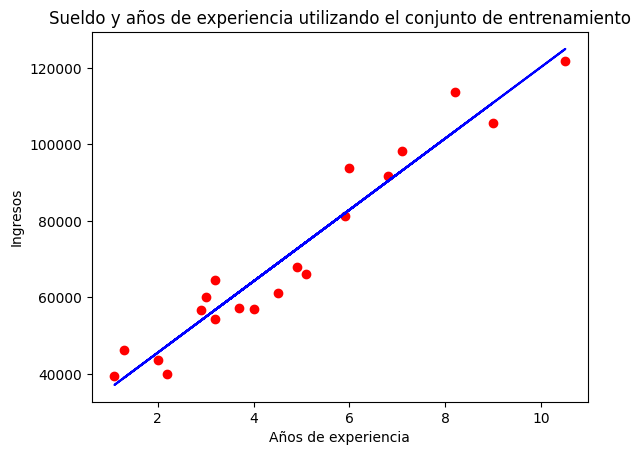

In [ ]:
plt.scatter(X_train, y_train, color="red")

plt.plot(X_train, linreg.predict(X_train), color="blue")
plt.title("Sueldo y años de experiencia utilizando el conjunto de entrenamiento")
plt.xlabel("Años de experiencia")
plt.ylabel("Ingresos")
plt.show()

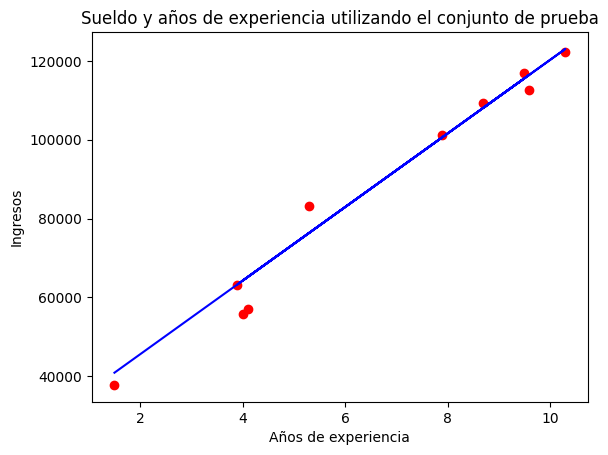

In [ ]:
plt.scatter(X_test, y_test, color="red")

plt.plot(X_test, linreg.predict(X_test), color="blue")
plt.title("Sueldo y años de experiencia utilizando el conjunto de prueba")
plt.xlabel("Años de experiencia")
plt.ylabel("Ingresos")
plt.show()

##Conclusiones
Se demuestra el impacto significativo que genera en el modelo un preprocesamiento de datos adecuado a través de técnicas como one hot y el escalamiento de datos resaltando la importancia de determinar adecaudamente la técnica que se implementará dependiendo de la naturaleza de la variable en el conjunto de datos.

##Referencias

*    IBM. (2018). Regresión lineal. https://www.ibm.com/mx-es/analytics/learn/linear-regression

